# 使用决策树和随机森林预测糖尿病
数据源: https://www.kaggle.com/uciml/pima-indians-diabetes-database#diabetes.csv

## 导入数据包

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. pregnant : 怀孕了几次
2. glucose  : 血糖
3. bp       ：血压
4. skin     ：皮脂厚度
5. insulin  ： 胰岛素
6. bmi      ：体质指数
7. pedigree ：糖尿病家族血统
8. age      ：年龄
9. label    : 是否患糖尿病

## 选择预测所需的特征

In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

# 特征
X = df[feature_cols]
# 类别标签
y = df.label

## 拆分数据集，训练和测试

In [4]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# 使用决策树分类器

In [5]:
clf = DecisionTreeClassifier(criterion = 'entropy')
# 训练模型
clf = clf.fit(X_train, y_train)
# 使用训练好的模型做预测
y_pred = clf.predict(X_test)

In [6]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7575757575757576


## 可视化训练好的决策树模型

/home/bishi/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


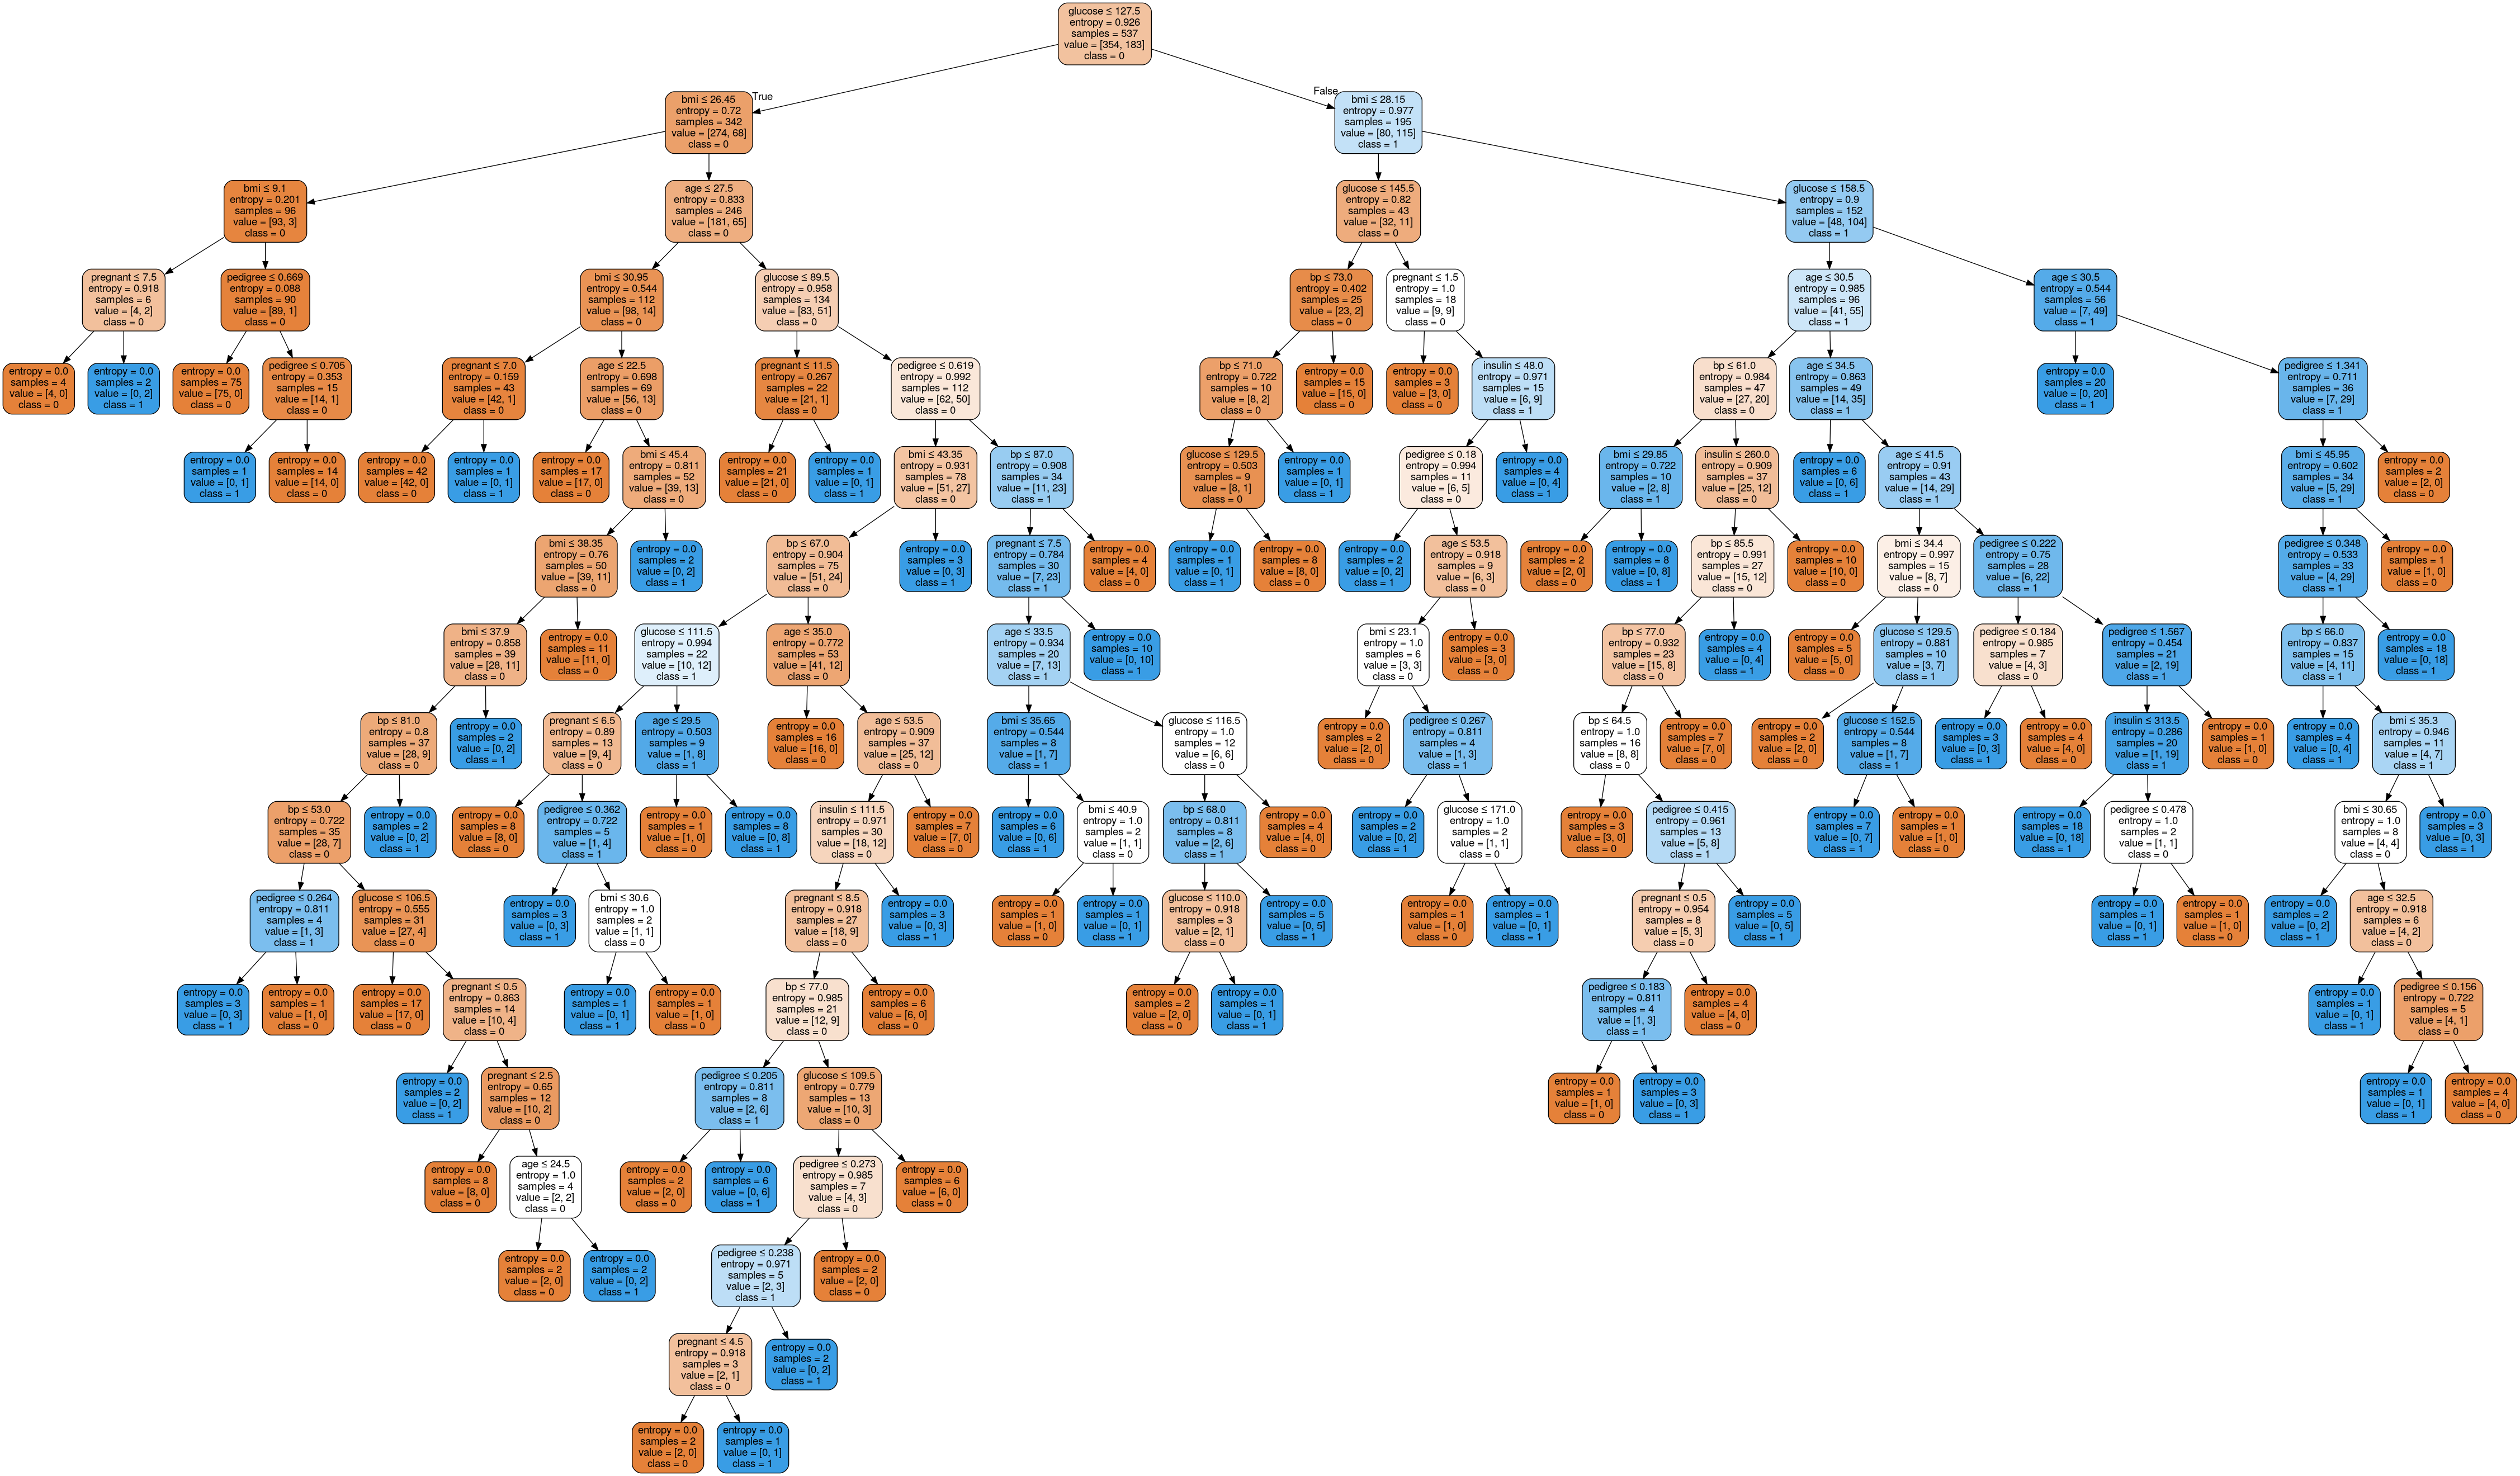

In [7]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True, 
                feature_names = feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabets.png')
Image(graph.create_png())

## 创建新的决策树，限定树的最大深度，减少过拟合

In [8]:
clf = DecisionTreeClassifier(
                criterion = 'entropy',
                # 定义树的深度, 可以用来防止过拟合
                max_depth=2, 
                # 定义叶子节点最少需要包含多少个样本(使用百分比表达), 防止过拟合
                #min_weight_fraction_leaf=0.01
            )
# 训练模型
clf = clf.fit(X_train, y_train)
# 使用训练好的模型做预测
y_pred = clf.predict(X_test)
# 模型的性能
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


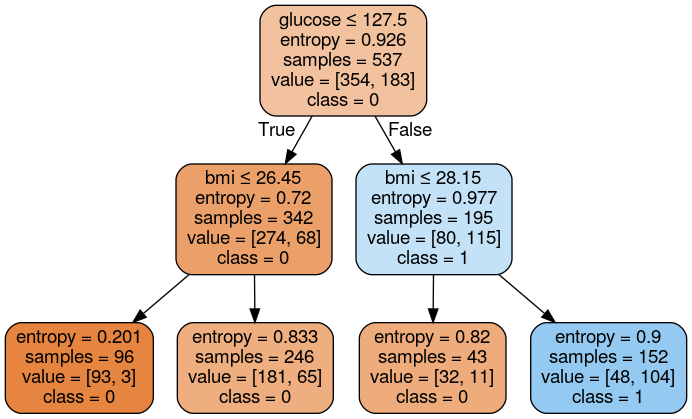

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True, 
                feature_names = feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabets2.png')
Image(graph.create_png())

# 使用随机森林

In [14]:
from sklearn.ensemble import RandomForestClassifier

# 随机森林, 通过调整参数来获取更好的结果
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100,
    # 定义树的深度, 可以用来防止过拟合
    max_depth=10, 
    # 定义至少多少个样本的情况下才继续分叉
    min_samples_split=10,
    # 定义叶子节点最少需要包含多少个样本(使用百分比表达), 防止过拟合
    # min_weight_fraction_leaf=0.01
    )

# 训练模型
rf.fit(X_train, y_train)

# 做预测
y_pred = rf.predict(X_test)

# 模型的准确率
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


rf_roc_auc = metrics.roc_auc_score(y_test, rf.predict(X_test))
print("随机森林 AUC = %2.2f" % rf_roc_auc)
print(metrics.classification_report(y_test, y_pred))

随机森林 AUC = 0.77
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       146
           1       0.81      0.64      0.71        85

    accuracy                           0.81       231
   macro avg       0.81      0.77      0.78       231
weighted avg       0.81      0.81      0.80       231



In [60]:
# 决策树
dtree = DecisionTreeClassifier(
        criterion = 'entropy',
        max_depth=2,
    )
dtree = dtree.fit(X_train, y_train)
print("\n\n\t\t\t ---决策树---")
dt_roc_auc = metrics.roc_auc_score(y_test, dtree.predict(X_test))
print("决策树 AUC = %2.2f" % dt_roc_auc)
print(metrics.classification_report(y_test, dtree.predict(X_test)))

# 随机森林
rf = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100,
    max_depth=10, 
    )
rf.fit(X_train, y_train)
print("\n\n\t\t\t ---随机森林---")
rf_roc_auc = metrics.roc_auc_score(y_test, rf.predict(X_test))
print("随机森林 AUC = %2.2f" % rf_roc_auc)
print(metrics.classification_report(y_test, rf.predict(X_test)))



			 ---决策树---
决策树 AUC = 0.74
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



			 ---随机森林---
随机森林 AUC = 0.76
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.78      0.62      0.69        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



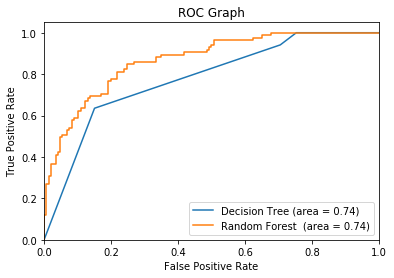

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

#  决策树
dtree_fpr, dtree_tpr, dtree_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])
## 随机森林
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure()

# 决策树 ROC
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# 随机森林 ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest  (area = %0.2f)' % rf_roc_auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc='lower right')
plt.show()

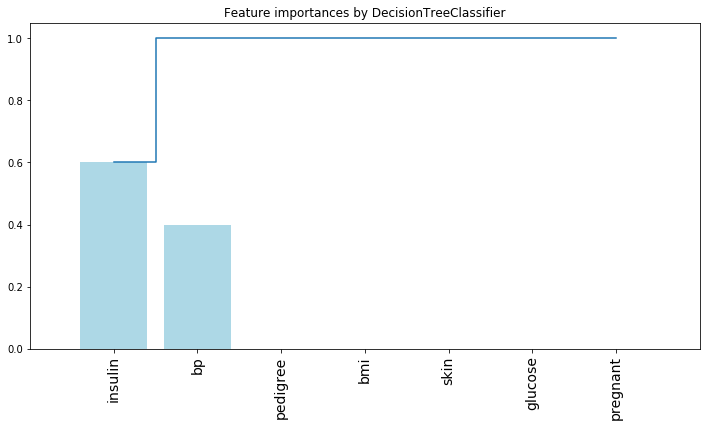

In [62]:
import numpy as np
importances = dtree.feature_importances_
feat_names = df.drop(['label'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

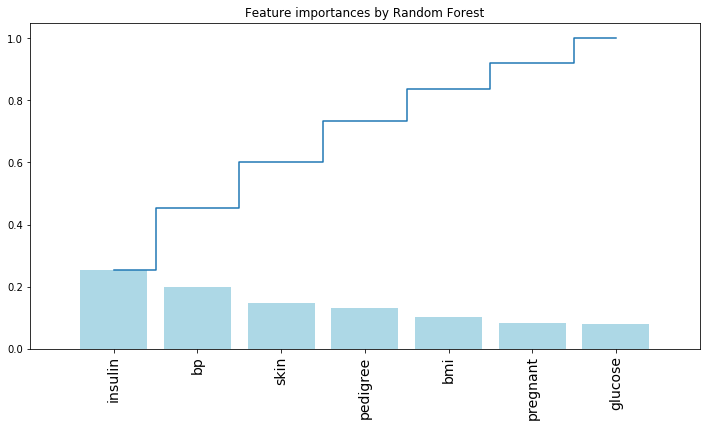

In [63]:
importances = rf.feature_importances_
feat_names = df.drop(['label'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by Random Forest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

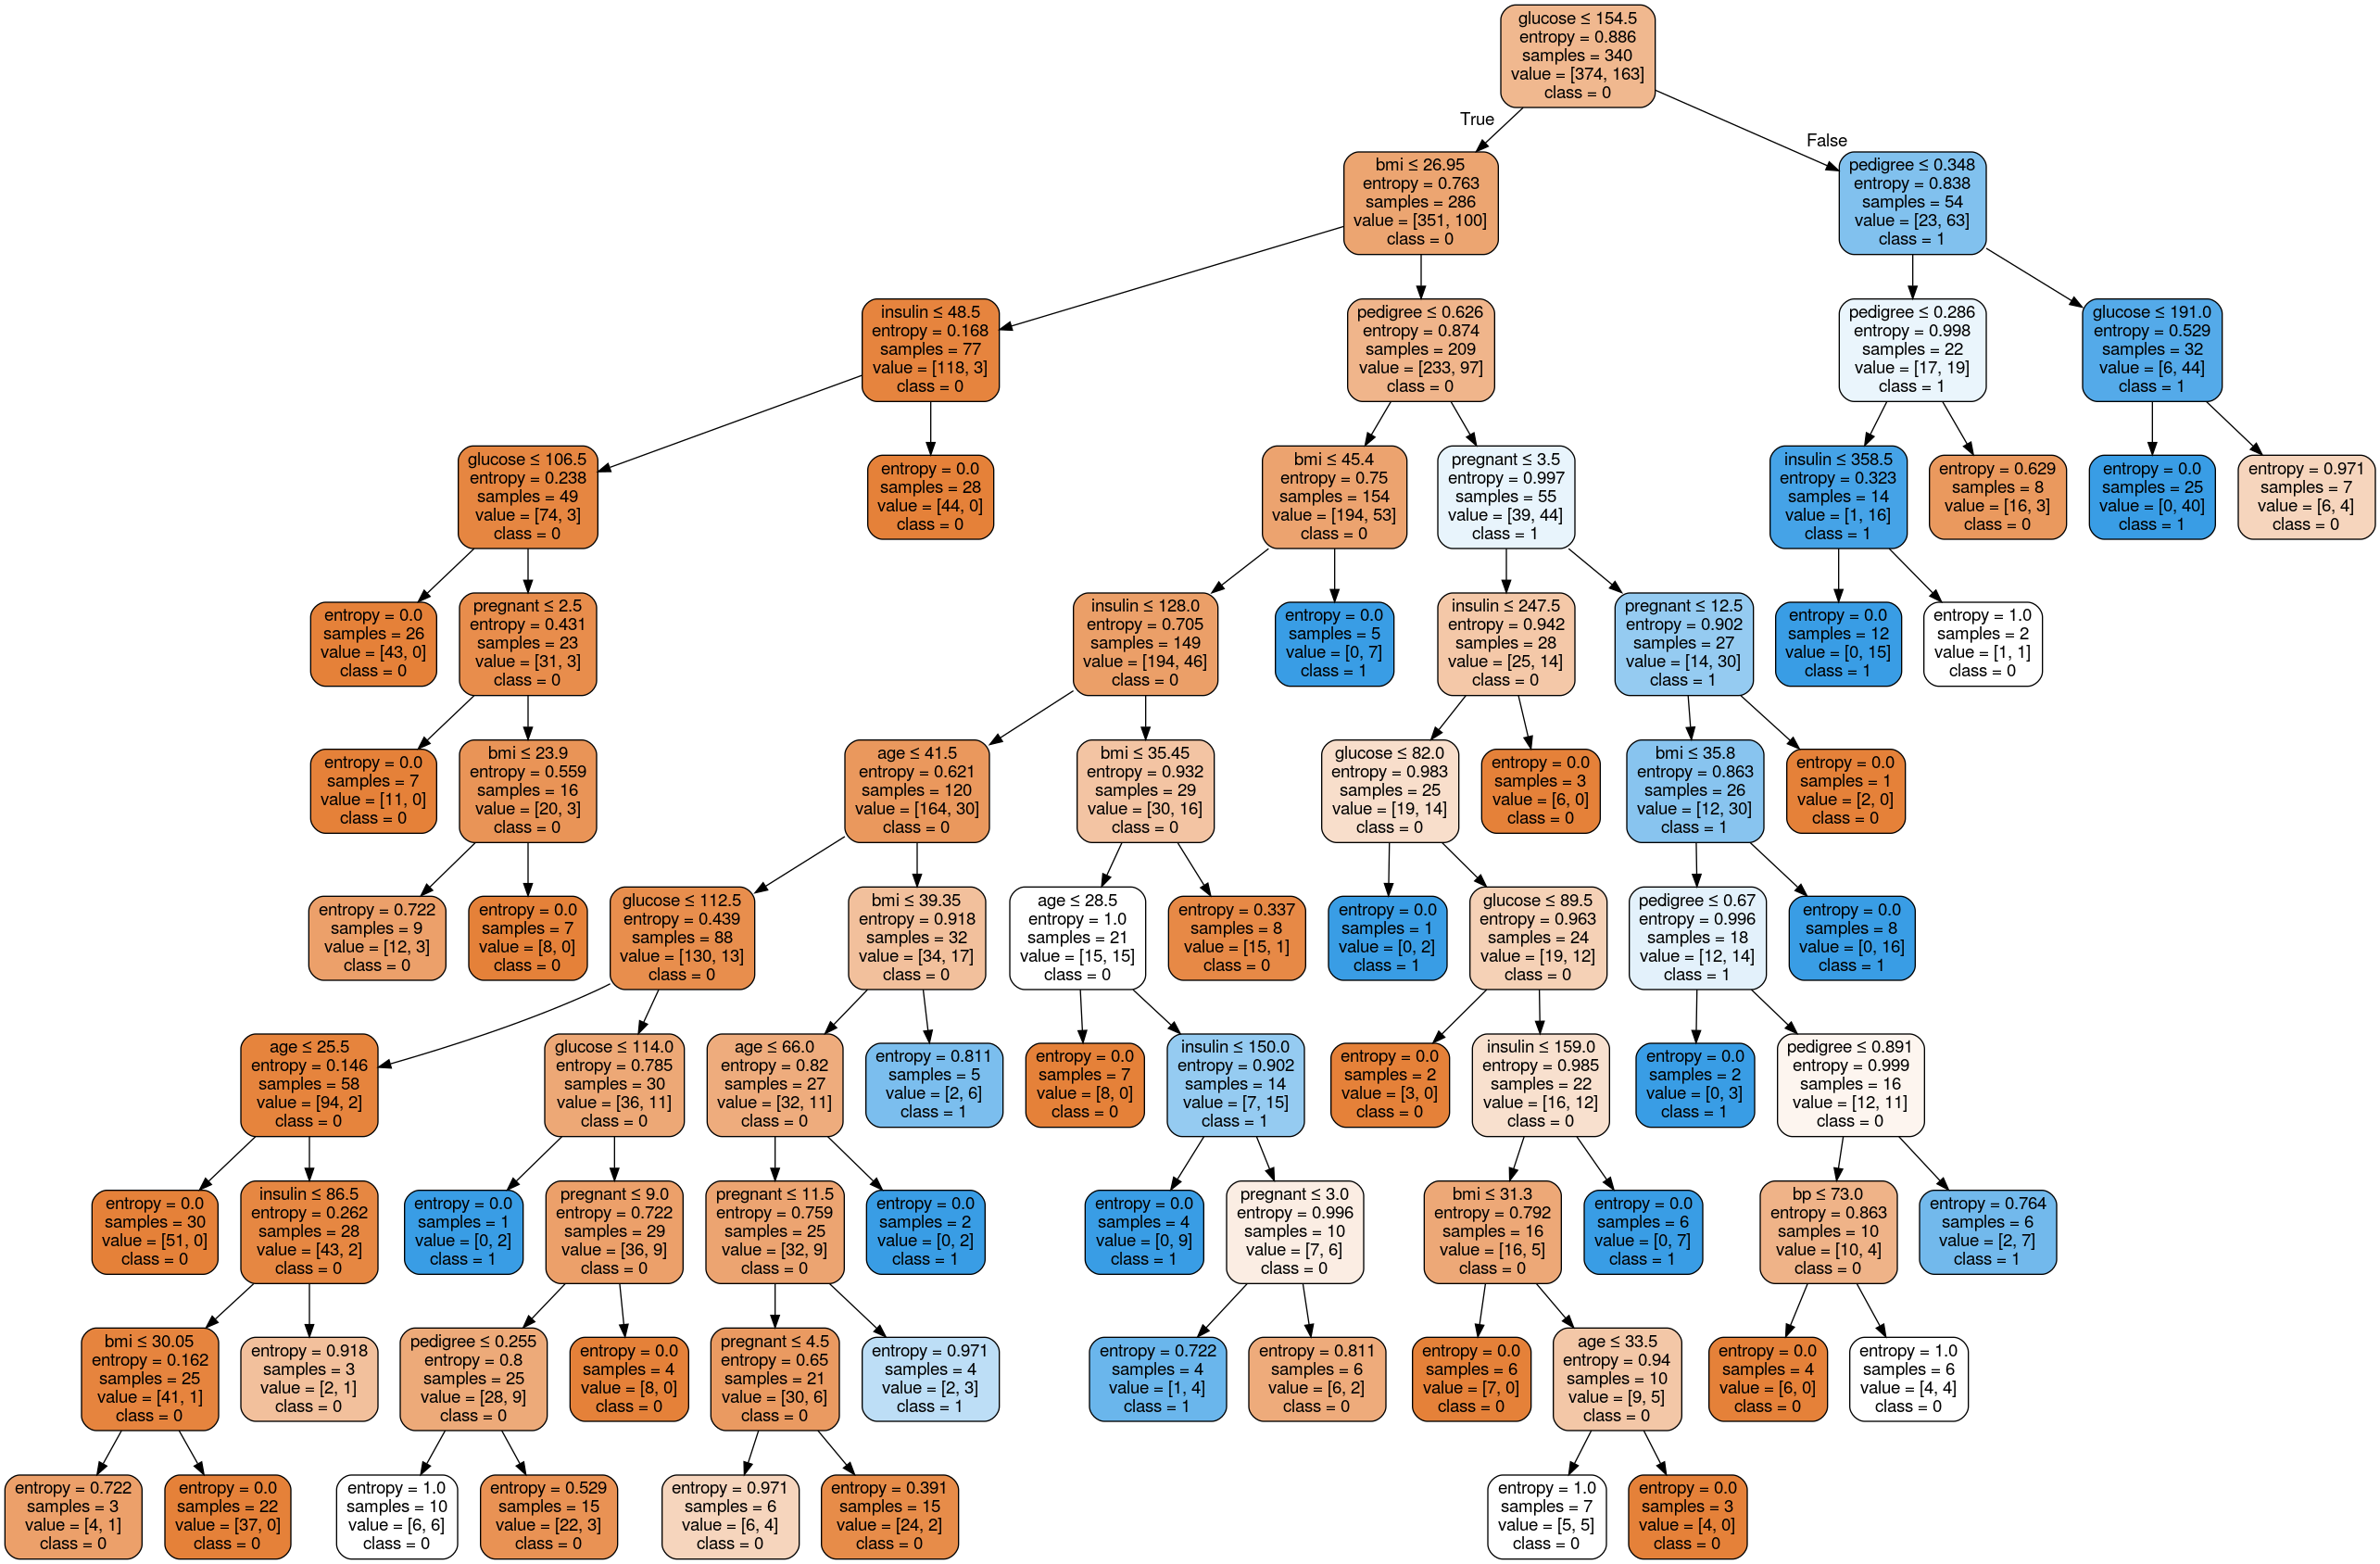

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(rf.estimators_[0], out_file = dot_data,
                filled = True, rounded = True,
                special_characters = True, 
                feature_names = feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabets3.png')
Image(graph.create_png())